In [ ]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sci
import matplotlib  as plt
import matplotlib.pyplot as pt
from scipy import stats
import sklearn
import pymc as pm
print(f"matplotlib version:{plt.__version__}")
print(f"numpy version:{np.__version__}")
print(f"pandas version:{pd.__version__}")
print(f"scipy version:{sci.__version__}")
print(f"seaborn version:{sns.__version__}")
print(f"sklearn version:{sklearn.__version__}")
print(f"PyCM version:{pm.__version__}")

matplotlib version:3.7.0
numpy version:1.24.0
pandas version:1.5.0
scipy version:1.10.0
seaborn version:0.12.0
sklearn version:1.0.2
PyCM version:4.0.0


#### Bayesian exercises
Exercise 1 (Theory). Consider the following derivation of the ELBO, a quantity used in variational Bayes inference. For each of the 4 lines in the derivation, explain its justification (hint: remember the “three power tools of statistics”).

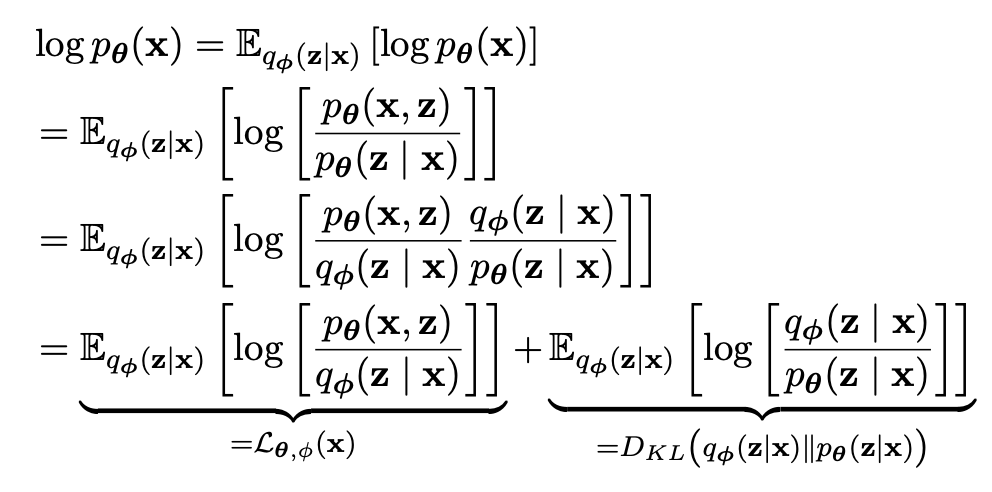

In [7]:
from IPython.display import Image
Image(filename='ELBO.png') 

* $log_{}p_{\Theta }\left ( x \right ) = E_{q_{\Phi\left ( z|x \right )}}\left [ log_{}p_{\Theta }\left ( x \right ) \right ]$ ------(1)
A constant's expected value corresponds to the identical constant itself: E[A] = A. 
For the expectation over z that is distributed according to q of z over the logarithm of $log_{}p_{\Theta }\left ( x \right )$, that means the expectation over something that does not contain z is just the expectation that was taken over a constant, so we get the logarithm of p of x, $log_{}p_{\Theta }\left ( x \right )$

* According to conditional probability, if events A and B are not independent, then the probability  that both events occur is defined by
$p(A,B) = p(A)p(B|A)$.
Considering a directed model where 
$p(z,x)= p(x|z)*p(x)$, we can simplify it as 
$p(x) = \frac{p(x,z)}{p(z|x)]}$, then 
 we can plug in $ \frac{p_{\Theta }(x,z)}{p_{\Theta }(z|x)} $ instead of $p_{\Theta }\left ( x \right )$
so we get :
$E_{q_{\Phi\left ( z|x \right )}}\left [log\left [ \frac{p_{\Theta }(x,z)}{p_{\Theta }(z|x)} \right ] \right ]$ ------(2) 
x represents the observed data while z is a collection of latent variables. 

* $\frac{q_{\Phi }(z|x)}{q_{\Phi }(z|x)} = 1$ 
Since 1 is a multiplicative identity in the set of real numbers, any other element of the set remains intact when multiplied by 1. 
So we multiply the second equation with $\frac{q_{\Phi }(z|x)}{q_{\Phi }(z|x)}$, and then simplify it. 
We get 
 $E_{q_{\Phi\left ( z|x \right )}} \left [ log\left [ \frac{p_{\Theta }(x,z)}{q_{\Phi  }(z|x)}\ast \frac{q_{\Phi }(z|x)}{p_{\Theta }(x|z)} \right ] \right ]$ ------(3)

* The product's logarithm is equal to the sum of its component parts' logarithms. $log_{b}\left ( M*N \right ) = log_{b}(M) + log_{b}(N)$
So apply this product rule on equation 3, we get  $E_{q_{\Phi\left ( z|x \right )}} \left [ log\left [ \frac{p_{\Theta }(x,z)}{q_{\Phi  }(z|x)}\right ]  +    log\left [ \frac{q_{\Phi }(z|x)}{p_{\Theta  }(z|x)}\right ]\right ]$  Expected values conform to the basic Linearity of Expectation rule. In its most basic form, it is stated that the expected value of a collection of random variables is the collection of the variables' expected values. E[A + B] = E[A] + E[B]. We can utilize linearity of the expectation to our equation as shown in equation 4.
 $E_{q_{\Phi\left ( z|x \right )}} \left [ log\left [ \frac{p_{\Theta }(x,z)}{q_{\Phi  }(z|x)}\right ]\right ]  +   E_{q_{\Phi\left ( z|x \right )}} \left [ log\left [ \frac{q_{\Phi }(z|x)}{p_{\Theta  }(z|x)}\right ]\right ]$ ------(4)
The first part of equation 4 is called the lower bound of the evidence or ELBO. The ELBO over q is defined as the expectation over z, according to q(z), over the logarithm of the joint p(z,x) over q(z). To perform inference, we have to find a surrogate q(z) that is approximately equal to the posterior $p(z|x)$, and then evaluate the fit of these two distributions, which is called KL divergence, as seen in the second part of equation 4. The higher the value of KL divergence, the further they are apart.
If KL divergence is zero, we have identical distributions.

#### Exercise 2 (Practical).
Consider the following pyMC3 model for Bayesian linear regression. There are 4 lines with errors. Identify them, correct the error, and explain why it was an error (i.e., not just what was wrong, but WHY it was wrong).


In [ ]:
# Define the model
with pm.Model() as model:
# Register the data - useful for later predictions, # when we replace x to predict y
x = pm.Data('x', x_data)
y = pm.Data('y_obs', y_data)
# Define priors
# Slope
a = pm.Normal("slope", mu=100, sigma=100)
# Intercapt
b = pm.Normal("intercept", mu=100, sigma=100) # Standard deviation - Note HalfNormal!
s = pm.Normal("sigma", sigma=0.001)
        # Define the likelihood (note the "observed" argument, and mu=ax+b)
        likelihood = pm.Normal("y", mu=a*x + b, sigma=s)
# Now we define the inference engine
# We will sample from the posterior using MCMC (Hamiltonian MC, NUTS) step = pm.NUTs()
        # The trace variable contains the samples a,b,s ~ P(a,b,s|D)
        trace = pm.sample(1000, tune=1000, init=None, step=step, cores=2)

* a = pm.Normal("slope", mu=100, sigma=100) is incorrect, mu and sigma are too high. 
Standardizing the prior distribution with mu= 0 and sigma = 1 can simplify calculations and comparisons with other normal distributions. Using a prior distribution with mu = 0 and sigma = 1 can be considered uninformative if we do not already know the mean and variance of the data. In other words, it does not introduce any significant biases or assumptions on the analysis. So, we can define the prior, slope by using standard normal distribution as follows,
a = pm.Normal("slope", mu=0, sigma=1)

* b = pm.Normal("intercept", mu=100, sigma=100) is incorrect, mu and sigma are too high. As mentioned in the previous point we can fix the prior  distribution by defining the intercept as  b = pm.Normal("intercept", mu=0, sigma=1). 


* s = pm.Normal("sigma", sigma=0.001), this one is incorrect because we require halfnormal instead of normal distribution.
The standard deviation (sigma) of a normal distribution is one positive continuous variable with a single mode at zero that is frequently modeled using the half-normal distribution. We assume that the standard deviation cannot be negative and that its distribution is symmetrical about zero when modeling it with the half-normal distribution. Using the half-normal distribution to describe sigma assures that sigma is always positive because the half-normal distribution is only specified for non-negative values. The right one is  s = pm.HalfNormal("sigma", sigma=1)


* likelihood = pm.Normal("y", mu=a*x + b, sigma=s) is incorrect.
The likelihood function and a prior distribution over the parameters would make up the full definition of a Bayesian linear regression model. A  normal probability function using observed data and parameters mu = a*x + b, sigma = s, etc. Nevertheless, this syntax lacks the observed data, therefore we can fix it by adding an observed argument with the value observed=y data.  likelihood = pm.Normal("y", mu=a*x + b, sigma=s, observed=y_data)

#### Exercise 3

In [39]:
# read in the data
dataTrain = np.loadtxt("IDSWeedCropTrain.csv", delimiter=",") 
dataTest = np.loadtxt("IDSWeedCropTest.csv", delimiter=",")
# split input variables and labels
XTrain = dataTrain[:, :-1]
YTrain = dataTrain[:, -1]
XTest = dataTest[:, :-1]
YTest = dataTest[:, -1]

In [40]:
counts_elements = np.unique(YTrain, return_counts=True)
print(counts_elements)

(array([0., 1.]), array([429, 571]))


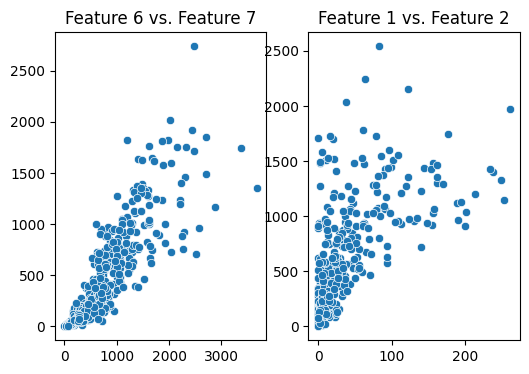

In [57]:
fig, ax = pt.subplots(1, 2, figsize=(6, 4))
g1=sns.scatterplot(x=XTest[:, 6],y=XTest[:, 7],ax=ax[0]).set(title='Feature 6 vs. Feature 7')
g2=sns.scatterplot(x=XTest[:, 1],y=XTest[:, 2],ax=ax[1]).set(title='Feature 1 vs. Feature 2')   

In [6]:
from sklearn.cluster import KMeans

In [42]:
model = KMeans(n_clusters=2)
model

KMeans(n_clusters=2)

In [43]:
model.fit(XTrain)

KMeans(n_clusters=2)

In [44]:
model.cluster_centers_

array([[5.69426752e+00, 4.93800425e+01, 7.91594480e+02, 3.84771338e+03,
        3.38588535e+03, 1.35988535e+03, 2.93734607e+02, 1.31609342e+02,
        7.07282378e+01, 3.96433121e+01, 1.94437367e+01, 4.23566879e+00,
        4.41613588e-01],
       [2.19092628e+00, 1.37315690e+01, 1.70943289e+02, 1.39436484e+03,
        3.18853497e+03, 2.62461815e+03, 1.00372023e+03, 6.32814745e+02,
        4.95829868e+02, 2.95400756e+02, 1.45809074e+02, 2.91984877e+01,
        2.83742911e+00]])

In [51]:
ypred = model.predict(XTest)

[Text(0.5, 1.0, 'Feature 1 vs. Feature 2')]

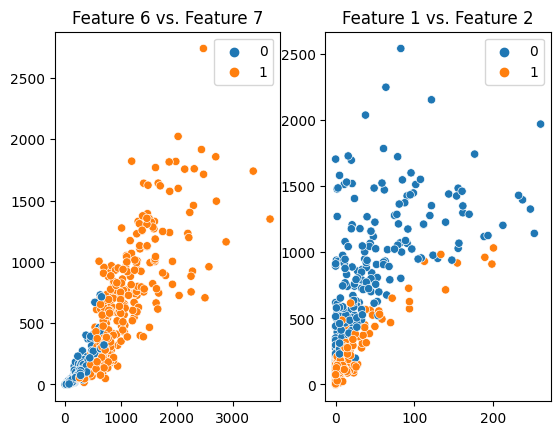

In [53]:
pt.subplot(1,2,1)
sns.scatterplot(x =XTest[:,6], y =XTest[:,7], hue = ypred).set(title='Feature 6 vs. Feature 7')
pt.subplot(1,2,2)
sns.scatterplot(x =XTest[:,1], y =XTest[:,2], hue = ypred).set(title='Feature 1 vs. Feature 2')

There are two clustering comparisons, one between feature 6 and feature 7, and the other between feature 1 and feature 2. After disposing in different colors, we can see the difference between the two groups both on the left and right hand sides. However, when we look into the details, the scatter plot that was generated from feature 6 vs. feature 7 does not show a clear separation, especially from 0 to 1000, while feature 1 vs. feature 2 shows better clustering.

[Text(0.5, 1.0, 'Feature 1 vs. Feature 2')]

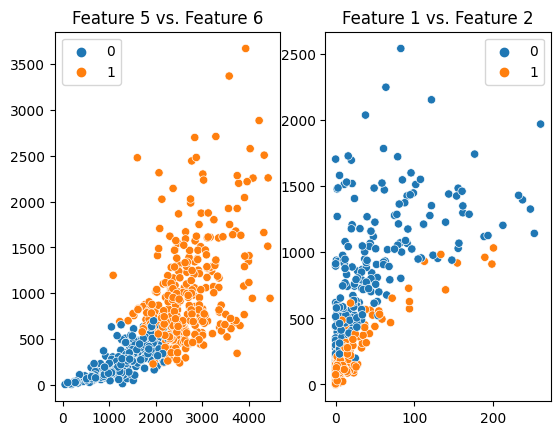

In [58]:
pt.subplot(1,2,1)
sns.scatterplot(x =XTest[:,5], y =XTest[:,6], hue = ypred).set(title='Feature 5 vs. Feature 6')
pt.subplot(1,2,2)
sns.scatterplot(x =XTest[:,1], y =XTest[:,2], hue = ypred).set(title='Feature 1 vs. Feature 2')